In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载Iris数据集
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df.head()

# 初始化 iris_report
iris_report = {}

In [180]:
# 数据类型识别
print("数据类型识别:")
print(iris_df.dtypes)

iris_report['数据类型'] = iris_df.dtypes.to_dict()

数据类型识别:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
dtype: object


In [181]:
# 统计概要
print("\n统计概要:")
print(iris_df.describe())

iris_report['统计概要'] = iris_df.describe().to_dict()


统计概要:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [182]:
print("\n类别分布:")
print(iris_df["species"].value_counts())

iris_report['类别分布'] = iris_df["species"].value_counts().to_dict()


类别分布:
species
0    50
1    50
2    50
Name: count, dtype: int64


特征分布图已保存为 iris_feature_distribution.png


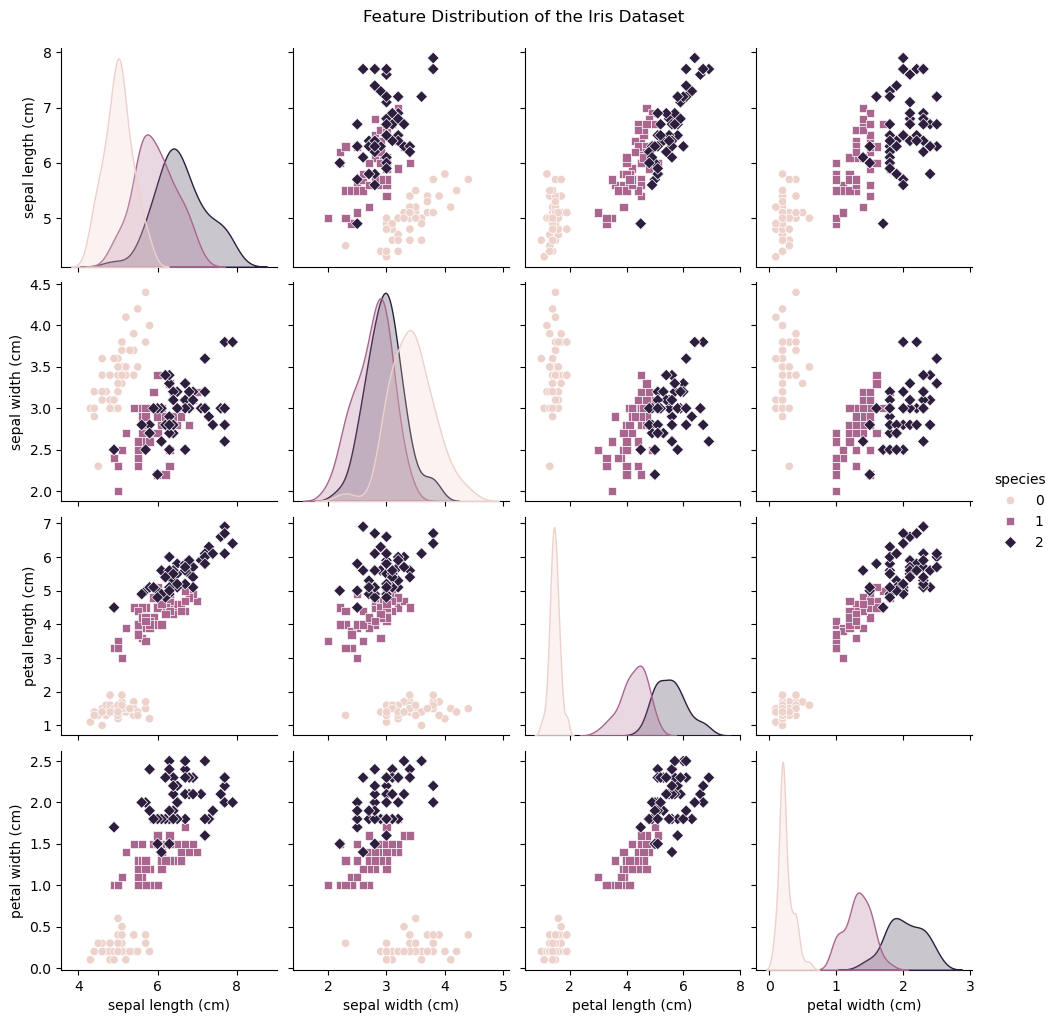

In [183]:
# 特征分布图
sns.pairplot(iris_df, hue='species', diag_kind='kde', markers=["o", "s", "D"])
plt.suptitle("Feature Distribution of the Iris Dataset", y=1.02)

plt.savefig("iris_feature_distribution.png")
print("特征分布图已保存为 iris_feature_distribution.png")

plt.show()


In [184]:
from jinja2 import Template

# 准备数据
基本信息 = {
    '行数': iris_df.shape[0],
    '列数': iris_df.shape[1],
    '列名': iris_df.columns.tolist(),
    '缺失值统计': iris_df.isnull().sum().to_dict(),
    '数据类型': iris_report['数据类型']
}
描述性统计 = iris_report['统计概要']
类别分布 = iris_report['类别分布']

# 定义HTML模板
html_template = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Iris Dataset Analysis Report</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 20px;
            background-color: #f9f9f9;
            color: #333;
        }
        h1 {
            color: #0056b3;
            text-align: center;
        }
        h2 {
            color: #0056b3;
            text-align: left;
        }
        .structured-section {
            margin: 15px 0;
            padding: 10px;
            background-color: white;
            border-radius: 8px;
            box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        }
        table {
            width: 100%;
            border-collapse: collapse;
            margin: 20px 0;
        }
        th, td {
            padding: 10px;
            border: 1px solid #ddd;
            text-align: left;
        }
        th {
            background-color: #f4f4f4;
        }
        tr:hover {
            background-color: #f1f1f1;
        }
        .sub-table th {
            background-color: #f8f9fa;
        }
        ul {
            list-style-type: none;
            padding: 0;
        }
        ul li {
            margin: 5px 0;
        }
        img {
            max-width: 100%;
            height: auto;
            display: block;
            margin: 20px auto;
        }
    </style>
</head>
<body>
    <h1>Iris数据集分析报告</h1>
    <h2>基本信息</h2>
    <ul>
        <li>行数: {{ 基本信息['行数'] }}</li>
        <li>列数: {{ 基本信息['列数'] }}</li>
    </ul>
    

    {% macro render_table(data, headers, title) %}
    <div class="structured-section">
        <h3>{{ title }}</h3>
        <table>
            <tr>
                {% for header in headers %}
                <th>{{ header }}</th>
                {% endfor %}
            </tr>
            {% for row in data %}
            <tr>
                {% for item in row %}
                <td>{{ item }}</td>
                {% endfor %}
            </tr>
            {% endfor %}
        </table>
    </div>
    {% endmacro %}

    {{ render_table(
        headers=["类别", "数量"],
        data=类别分布.items()|list,
        title="类别分布"
    ) }}

    {{ render_table(
        headers=["列名", "数据类型"],
        data=基本信息['数据类型'].items()|list,
        title="数据类型"
    ) }}

    {{ render_table(
        headers=["列名", "缺失值数量"],
        data=基本信息['缺失值统计'].items()|list,
        title="缺失值统计"
    ) }}

    <div class="structured-section">
        <h3>描述性统计</h3>
        <table>
            <tr>
                <th>特征</th>
                <th>最小值</th>
                <th>最大值</th>
                <th>均值</th>
                <th>标准差</th>
            </tr>
            {% for feature, stats in 描述性统计.items() %}
            <tr>
                <td>{{ feature }}</td>
                <td>{{ stats['min'] }}</td>
                <td>{{ stats['max'] }}</td>
                <td>{{ stats['mean'] }}</td>
                <td>{{ stats['std'] }}</td>
            </tr>
            {% endfor %}
        </table>
    </div>

    {% macro render_list(items, title) %}
    <div class="structured-section">
        <h3>{{ title }}</h3>
        <ul>
            {% for item in items %}
            <li>{{ item }}</li>
            {% endfor %}
        </ul>
    </div>
    {% endmacro %}

    <h2>特征分布图</h2>
    <img src="iris_feature_distribution.png" alt="Feature Distribution">
</body>
</html>
"""

template = Template(html_template)
html_content = template.render(基本信息=基本信息, 描述性统计=描述性统计, 类别分布=类别分布)

with open("iris_analysis_report.html", "w", encoding="utf-8") as f:
    f.write(html_content)

print("数据分析报告已导出为 iris_analysis_report.html")

数据分析报告已导出为 iris_analysis_report.html
